## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

### 0. Load the dataset

In [ ]:
# cloning
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/H-captcha-dataset/hcaptcha_dataset.zip')

In [ ]:
import os

### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [ ]:
os.chdir('/content/hcaptcha_dataset/train')
os.getcwd()

'/content/hcaptcha_dataset/train'

In [ ]:
import pathlib

# define the path
currentDirectory = pathlib.Path('.')
ls = []
for currentFile in currentDirectory.iterdir():
    ls.append(str(currentFile))
ls

['bicycle', 'airplane', 'truck', 'boat', 'motorbus', 'motorcycle', 'seaplane']

In [ ]:
os.chdir('/content/hcaptcha_dataset/test')
os.getcwd()

'/content/hcaptcha_dataset/test'

In [ ]:
import pathlib

# define the path
currentDirectory = pathlib.Path('.')
lst = []
for currentFile in currentDirectory.iterdir():
    lst.append(str(currentFile))
lst

['bicycle', 'airplane', 'truck', 'boat', 'motorbus', 'motorcycle', 'seaplane']

b) How many train and test images are present in your dataset?

In [ ]:
os.chdir('/content/hcaptcha_dataset/train')
os.getcwd()

'/content/hcaptcha_dataset/train'

In training set

In [ ]:
f_train = 0
all_train = []
for root, dirs, files in os.walk("."):
  if files!=[]:
    all_train.append(files)
  for filename in files:
    f_train+=1
f_train

3018

In [ ]:
for i in range(len(ls)):
  print( ls[i],len(all_train[i]))

bicycle 304
airplane 402
truck 656
boat 528
motorbus 256
motorcycle 592
seaplane 280


In [ ]:
os.chdir('..')

In [ ]:
os.chdir('test')
os.getcwd()

'/content/hcaptcha_dataset/test'

In test set

In [ ]:
f_test = 0
all_test = []
for root, dirs, files in os.walk("."):
  if files!=[]:
    all_test.append(files)
  for filename in files:
      f_test+=1
f_test

746

In [ ]:
for i in range(len(lst)):
  print( lst[i],len(all_test[i]))

bicycle 71
airplane 101
truck 163
boat 134
motorbus 61
motorcycle 141
seaplane 75


c) Write a function to display a random image and its shape. Find out whether
the shape of each image is the same or not. If not then make all images of the
same shape.

Shape:  (128, 128, 3)


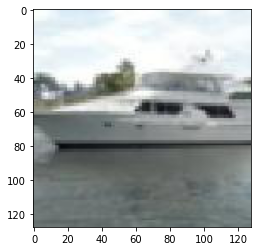

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
path = '/content/hcaptcha_dataset/'
t = random.randint(0,6)
im = all_train[t][random.randint(0,len(all_train[t])-1)]
path+='train/'+ls[t]+'/'+im
photo=plt.imread(path)
print("Shape: ",photo.shape)
plt.imshow(photo)

Checking shape of each image. return number of images of not same size.

In [ ]:
c=0
for i in range(7):
  for j in range(len(all_train[i])):
      path = '/content/hcaptcha_dataset/train/'
      im = all_train[i][j]
      path+=ls[i]+'/'+im
      photo=plt.imread(path)
      if photo.shape!=(128,128,3):
        c+=1
print("No of images in train data of not same size : ",c)

No of images in train data of not same size :  79


In [ ]:
c=0
for i in range(7):
  for j in range(len(all_test[i])):
      path = '/content/hcaptcha_dataset/test/'
      im = all_test[i][j]
      path+=lst[i]+'/'+im
      photo=plt.imread(path)
      if photo.shape!=(128,128,3):
        c+=1
print("No of images in test data of not same size : ",c)

No of images in test data of not same size :  20


Converting all images into same size

In [ ]:
from PIL import Image
for i in range(7):
  for j in range(len(all_train[i])):
      path = '/content/hcaptcha_dataset/train/'
      im = all_train[i][j]
      path+=ls[i]+'/'+im
      photo=Image.open(path)
      photo = photo.resize((128, 128), Image.ANTIALIAS)
      photo = photo.save(path)

In [ ]:
for i in range(7):
  for j in range(len(all_test[i])):
      path = '/content/hcaptcha_dataset/test/'
      im = all_test[i][j]
      path+=lst[i]+'/'+im
      photo=Image.open(path)
      photo = photo.resize((128, 128), Image.ANTIALIAS)
      photo = photo.save(path)

d) Do you think removing color channels (R, G, B) from images would lead to
poor modeling? How can you justify converting each image to greyscale? What
will be the effect of using a colored 3-channel image over a grayscale one on the
classification model’s performance?

No RGB to grayscale images will just reduce computation of model and improve the model as model need to learn from distances between 2 images not colors

e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

Yes normalization helps as it reduces our computation as values are between 0 and 1

Normalizing data for easier computation

In [ ]:
def normalize(data):
  for i in range(len(data)):
    data[i] = data[i] / 255
  return data

f) Visualize 3 random training images along with the labels for each class. The
dataset was manually labeled, do you spot any errors in the labels?

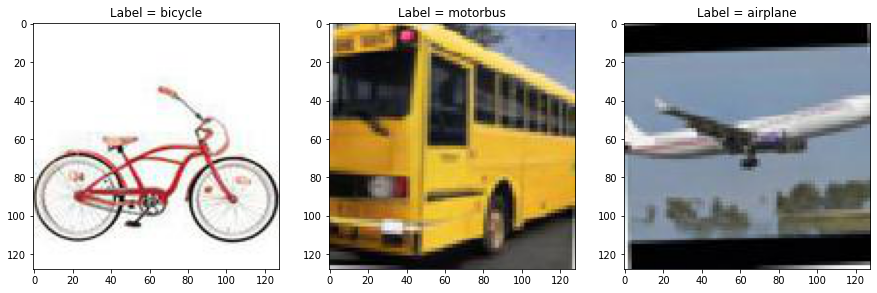

In [ ]:
fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 3

for i in range(3):
  path = '/content/hcaptcha_dataset/'
  t = random.randint(0,6)
  im = all_train[t][random.randint(0,len(all_train[t])-1)]
  path+='train/'+ls[t]+'/'+im
  fig.add_subplot(rows, columns, i+1)
  photo=plt.imread(path)
  plt.title('Label = '+ls[t])
  plt.imshow(photo)

Yes after seeing manually some labels are wrong for some images.

### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

If we take cross fold from whole dataset our model may have less images from a certain label for trainin and more for testin.

In [ ]:
os.chdir('/content/hcaptcha_dataset/train')

In [ ]:
def cross(ls,all_train,k,v):
  im = []
  label = []
  for j in range(len(ls)):
    for c in range(len(all_train[j])):
      im.append(all_train[j][c])
      label.append(ls[j])
  size = len(im)//k
  d = []
  y = []
  for i in range(k-1):
    d.append(im[i*size : (i+1)*size])
    y.append(label[i*size : (i+1)*size])
  d.append(im[(k-1)*size:])
  y.append(label[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = []
  for i in d:
    train += i
  y_train = []
  for i in y:
    y_train += i
  return train,test,y_train,y_test

In [ ]:
import collections
k=10
for v in range(k):
  train,test,y_train,y_test = cross(ls,all_train,k,v)
  counter=collections.Counter(y_train)
  print("Train data :",counter)
  counter=collections.Counter(y_test)
  print("Test data :",counter)

Train data : Counter({'truck': 656, 'motorcycle': 592, 'boat': 528, 'airplane': 402, 'seaplane': 280, 'motorbus': 256, 'bicycle': 3})
Test data : Counter({'bicycle': 301})
Train data : Counter({'truck': 656, 'motorcycle': 592, 'boat': 528, 'bicycle': 301, 'seaplane': 280, 'motorbus': 256, 'airplane': 104})
Test data : Counter({'airplane': 298, 'bicycle': 3})
Train data : Counter({'motorcycle': 592, 'boat': 528, 'truck': 459, 'bicycle': 304, 'airplane': 298, 'seaplane': 280, 'motorbus': 256})
Test data : Counter({'truck': 197, 'airplane': 104})
Train data : Counter({'motorcycle': 592, 'boat': 528, 'airplane': 402, 'truck': 355, 'bicycle': 304, 'seaplane': 280, 'motorbus': 256})
Test data : Counter({'truck': 301})
Train data : Counter({'motorcycle': 592, 'truck': 498, 'airplane': 402, 'boat': 385, 'bicycle': 304, 'seaplane': 280, 'motorbus': 256})
Test data : Counter({'truck': 158, 'boat': 143})
Train data : Counter({'truck': 656, 'motorcycle': 592, 'airplane': 402, 'bicycle': 304, 'seap

There are no seaplane training examples in last iteration. Similarly in 1st iteration there are less training data for bicycle

b) What can you do to ensure that every fold contains images from each class and no duplicates? Do the needful on your dataset that will ensure similar crossvalidation folds.

In [ ]:
def bettercross(ls,all_train,k,v):
  d = []
  y = []
  for im in range(len(all_train)):
    size = len(all_train[im])//k
    for i in range(k-1):
      d.append(all_train[im][i*size : (i+1)*size])
      y.append([ls[im] for j in range(i*size , (i+1)*size)])
    d.append(all_train[im][(k-1)*size:])
    y.append([ls[im] for j in range((k-1)*size,len(all_train[im]))])
  test = [d[j] for j in range(v,len(ls)*k,k)]
  x_c = d.copy()
  for j in range(v,len(ls)*k,k):
    d.remove(x_c[j])
  x_test = []
  for i in test:
    x_test += i
  y_t = [y[j] for j in range(v,len(ls)*k,k)]
  y_c = y.copy()
  for j in range(v,len(ls)*k,k):
    y.remove(y_c[j])
  y_test = []
  for i in y_t:
    y_test += i
  train = []
  for i in d:
    train += i
  y_train = []
  for i in y:
    y_train += i
  return train,x_test,y_train,y_test

We will be implementing a cross validation but for a smaller set too in the given data

In [ ]:
def smallcross(ls,all_train,k,v):
  d = []
  y = []
  for im in range(len(all_train)):
    size = len(all_train[im])//k
    for i in range(5):
      d.append(all_train[im][i*size : (i+1)*size])
      y.append([ls[im] for j in range(i*size , (i+1)*size)])
  test = [d[j] for j in range(v,len(ls)*5,5)]
  x_c = d.copy()
  for j in range(v,len(ls)*5,5):
    d.remove(x_c[j])
  x_test = []
  for i in test:
    x_test += i
  y_t = [y[j] for j in range(v,len(ls)*5,5)]
  y_c = y.copy()
  for j in range(v,len(ls)*5,5):
    y.remove(y_c[j])
  y_test = []
  for i in y_t:
    y_test += i
  train = []
  for i in d:
    train += i
  y_train = []
  for i in y:
    y_train += i
  return train,x_test,y_train,y_test

In [ ]:
import collections
k=10
for v in range(k):
  train,test,y_train,y_test = bettercross(ls,all_train,k,v)
  counter=collections.Counter(y_train)
  print("Train data :",counter)
  counter=collections.Counter(y_test)
  print("Test data :",counter)

Train data : Counter({'truck': 591, 'motorcycle': 533, 'boat': 476, 'airplane': 362, 'bicycle': 274, 'seaplane': 252, 'motorbus': 231})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 591, 'motorcycle': 533, 'boat': 476, 'airplane': 362, 'bicycle': 274, 'seaplane': 252, 'motorbus': 231})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 591, 'motorcycle': 533, 'boat': 476, 'airplane': 362, 'bicycle': 274, 'seaplane': 252, 'motorbus': 231})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 591, 'motorcycle': 533, 'boat': 476, 'airplane': 362, 'bicycle': 274, 'seaplane': 252, 'motorbus': 231})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplan

Now training and testing data is uniform and Now for any iteration training set will contain enough data to train on each label

In [ ]:
import collections
k=10
for v in range(5):
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  counter=collections.Counter(y_train)
  print("Train data :",counter)
  counter=collections.Counter(y_test)
  print("Test data :",counter)

Train data : Counter({'truck': 260, 'motorcycle': 236, 'boat': 208, 'airplane': 160, 'bicycle': 120, 'seaplane': 112, 'motorbus': 100})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 260, 'motorcycle': 236, 'boat': 208, 'airplane': 160, 'bicycle': 120, 'seaplane': 112, 'motorbus': 100})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 260, 'motorcycle': 236, 'boat': 208, 'airplane': 160, 'bicycle': 120, 'seaplane': 112, 'motorbus': 100})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplane': 40, 'bicycle': 30, 'seaplane': 28, 'motorbus': 25})
Train data : Counter({'truck': 260, 'motorcycle': 236, 'boat': 208, 'airplane': 160, 'bicycle': 120, 'seaplane': 112, 'motorbus': 100})
Test data : Counter({'truck': 65, 'motorcycle': 59, 'boat': 52, 'airplan

This is a smaller crossvalidation set

Converting images into numpy array for creating a model

In [ ]:

def flat(train,y_train):
  data = []
  for i in range(len(train)):
    path = '/content/hcaptcha_dataset/train/' + y_train[i] + '/' + train[i]
    photo=plt.imread(path)
    photo = photo.reshape(49152,)
    data.append(np.array(photo))
  return data

In [ ]:
def convert(l):
  k = []
  ls = ['bicycle', 'boat', 'motorbus', 'airplane', 'motorcycle', 'truck', 'seaplane']
  for i in l:
    k.append(ls.index(i))
  return k


In [ ]:

def flatt(test,y_test):
  data = []
  for i in range(len(test)):
    path = '/content/hcaptcha_dataset/test/' + y_test[i] + '/' + test[i]
    photo=plt.imread(path)
    photo = photo.reshape(49152,)
    data.append(np.array(photo))
  return data

### 3. Is Logistic regression a good algorithm for your dataset? Why or why not Based on the classification algorithms taught in class, which algorithms can be used to solve this problem?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Print cross val score

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

In [ ]:
k=10
for v in range(5):
  model = LogisticRegression()
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.802675585284281
0.842809364548495
0.7692307692307693
0.8461538461538461
0.802675585284281


Logistic is not good as we have less data and cross validation accuracy score variate too much

### 4. Train the KNN classifier algorithm on the training dataset. Don’t use the test set at this time.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

a) What distance/similarity function should we use for comparing images?
Compare at least 3 different metrics on a few random samples to get some
understanding of how they work.

Euclidean distance = 	$\sqrt(\sum((x - y)^2))$

In [ ]:
for v in range(5):
  model = KNeighborsClassifier(metric='euclidean')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.7357859531772575
0.7157190635451505
0.7090301003344481
0.7090301003344481
0.7190635451505016


Scores are good in case of euclidean distance

Chebyshev distance = $max(|x - y|)$

In [ ]:
for v in range(5):
  model = KNeighborsClassifier(metric='chebyshev')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.20735785953177258
0.2140468227424749
0.1939799331103679
0.19732441471571907
0.19732441471571907


This distance metric is bad for our data

Braycurtis distance = $\sum|x - y| / (\sum|x| + \sum|y|)$

In [ ]:
for v in range(5):
  model = KNeighborsClassifier(metric='braycurtis')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.7658862876254181
0.7525083612040134
0.7357859531772575
0.7391304347826086
0.7558528428093646


This distance metric has good score but its slower than euclidean and run slower on even larger set

b) What is the impact of increasing K on the speed and accuracy of the
algorithm?

In [ ]:
train,test,y_train,y_test = bettercross(ls,all_train,k,random.randint(0,9))
train = flat(train,y_train)
train = normalize(train)
test = flat(test,y_test)
test = normalize(test)
target = convert(y_train)
test_target = convert(y_test)
for neigh in range(1,20):
  model = KNeighborsClassifier(n_neighbors=neigh, metric='euclidean')
  model.fit(train, target)
  y_pred = model.predict(test)
  print("knn with k :",neigh,"has a score of " ,accuracy_score(y_pred,test_target))

knn with k : 1 has a score of  0.7993311036789298
knn with k : 2 has a score of  0.7525083612040134
knn with k : 3 has a score of  0.7959866220735786
knn with k : 4 has a score of  0.7892976588628763
knn with k : 5 has a score of  0.7625418060200669
knn with k : 6 has a score of  0.7625418060200669
knn with k : 7 has a score of  0.7625418060200669
knn with k : 8 has a score of  0.7625418060200669
knn with k : 9 has a score of  0.7525083612040134
knn with k : 10 has a score of  0.745819397993311
knn with k : 11 has a score of  0.745819397993311
knn with k : 12 has a score of  0.7324414715719063
knn with k : 13 has a score of  0.7424749163879598
knn with k : 14 has a score of  0.725752508361204
knn with k : 15 has a score of  0.7324414715719063
knn with k : 16 has a score of  0.7157190635451505
knn with k : 17 has a score of  0.7224080267558528
knn with k : 18 has a score of  0.7157190635451505
knn with k : 19 has a score of  0.7157190635451505


As k increases algorithm run slower, accuracy is higher ealrier then remains constant and then it decreases

c) Choose a good value of K and the distance metric based on cross-validation.

We can choose k=7, and distance metric euclidean

In [ ]:
for v in range(k):
  model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
  train,test,y_train,y_test = bettercross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.782608695652174
0.782608695652174
0.7391304347826086
0.7591973244147158
0.7658862876254181
0.7391304347826086
0.7491638795986622
0.7759197324414716
0.7625418060200669
0.7614678899082569


### 5. Train SVM classifiers on the dataset. Don’t use the test set at this time.

a) Which kernel functions can be used for this dataset? Why?

rbf ,linear, polynomial can be used as it is a multiclass classification

b) Which of the SVM implementations (SVC, SGDClassifier, NuSVC and LinearSVC)
is the best for this dataset? Why?


SVC with linear kernel function is good as it takes less time to run compared to others and data is easily linear classifier separable. Other SVC kernel functions are also good here but not much greater accuracy is achieved vs the more time it takes compared to linear kernel

In [ ]:
from sklearn import svm
for v in range(5):
  model = svm.SVC(kernel='rbf')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.842809364548495
0.862876254180602
0.8093645484949833
0.8695652173913043
0.8361204013377926


In [ ]:
from sklearn import svm
for v in range(5):
  model = svm.SVC(kernel='poly')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.8494983277591973
0.8729096989966555
0.8193979933110368
0.8193979933110368
0.802675585284281


In [ ]:
from sklearn import svm
for v in range(5):
  model = svm.SVC(kernel='linear')
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.8327759197324415
0.8695652173913043
0.8060200668896321
0.8294314381270903
0.8193979933110368


Linear SVC takes lots of time even for smaller data

In [ ]:
# from sklearn import svm
# for v in range(2):
#   model = svm.LinearSVC()
#   train,test,y_train,y_test = smallcross(ls,all_train,k,v)
#   train = flat(train,y_train)
#   train = normalize(train)
#   test = flat(test,y_test)
#   test = normalize(test)
#   target = convert(y_train)
#   test_target = convert(y_test)
#   model.fit(train, target)
#   y_pred = model.predict(test)
#   print(accuracy_score(y_pred,test_target))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
for v in range(5):
  model = SGDClassifier()
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.7357859531772575
0.8394648829431438
0.7658862876254181
0.862876254180602
0.7759197324414716


Compared to others SGD do not give good accuracy

In [ ]:
from sklearn import svm
for v in range(3):
  model = svm.NuSVC()
  train,test,y_train,y_test = smallcross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.7859531772575251
0.7892976588628763
0.7692307692307693


NuSVC is not better than SVC

c) Finalize your SVM model based on cross-validation


In [ ]:
from sklearn import svm
for v in range(k):
  model = svm.SVC(kernel='linear')
  train,test,y_train,y_test = bettercross(ls,all_train,k,v)
  train = flat(train,y_train)
  train = normalize(train)
  test = flat(test,y_test)
  test = normalize(test)
  target = convert(y_train)
  test_target = convert(y_test)
  model.fit(train, target)
  y_pred = model.predict(test)
  print(accuracy_score(y_pred,test_target))

0.8662207357859532
0.8729096989966555
0.8160535117056856
0.8662207357859532
0.8193979933110368
0.862876254180602
0.8795986622073578
0.8528428093645485
0.8561872909698997
0.8318042813455657


In [ ]:
l = [0.8662207357859532,
0.8729096989966555,
0.8160535117056856,
0.8662207357859532,
0.8193979933110368,
0.862876254180602,
0.8795986622073578,
0.8528428093645485,
0.8561872909698997,
0.8318042813455657]
sum(l)/10

0.8524111973653259

Model has avg accuracy of 85%

### 6. Evaluate and compare the classification models on the test set provided to you

In [ ]:
#pre processing data
def preprocess(ls,all_train):
  d = []
  y = []
  for i in range(len(ls)):
    for j in range(len(all_train[i])):
      d.append(all_train[i][j])
      y.append(ls[i])
  return d,y

a) Calculate the classification accuracy of both the models and compare

KNN

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
train,label = preprocess(ls,all_train)
test,actual = preprocess(lst,all_test)
train = flat(train,label)
test = flatt(test,actual)
train = normalize(train)
test = normalize(test)
target = convert(label)
test_target1 = convert(actual)
model1.fit(train, target)
y_pred_knn = model1.predict(test)
print(accuracy_score(y_pred_knn,test_target1))

0.792225201072386


SVM perform much better compared to KNN

SVC SVM with kernel function = linear

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
model = svm.SVC(kernel='linear')
train,label = preprocess(ls,all_train)
test,actual = preprocess(lst,all_test)
train = flat(train,label)
test = flatt(test,actual)
train = normalize(train)
test = normalize(test)
target = convert(label)
test_target = convert(actual)
model.fit(train, target)
y_pred_svm = model.predict(test)
accuracy_score(y_pred_svm,test_target)

0.8927613941018767

b) Which are the two classes that were most confused by your model? What
classification evaluation metric can be used to best visualize it? Plot the
visualization for both models

Boat and airplane and highest mismatching in between them

Confusion matrix SVM

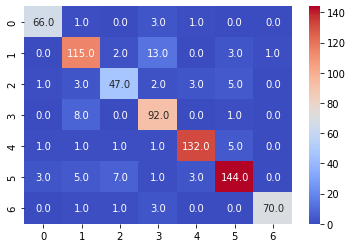

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(test_target, y_pred_svm)
sns.heatmap(conf,annot = True, fmt='1.1f',cmap= 'coolwarm')

Confusion matrix KNN

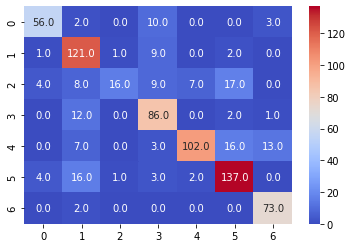

In [ ]:
conf1 = confusion_matrix(test_target1, y_pred_knn)
sns.heatmap(conf1,annot = True, fmt='1.1f',cmap= 'coolwarm')

c) Do you think you can maximize both Precision and Recall for a model? What
do you think will be a better metric to judge a model?

No there is always a precision recall tradeoff. Based on needs one is increased while other is decreased

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_target1, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        71
           1       0.72      0.90      0.80       134
           2       0.89      0.26      0.41        61
           3       0.72      0.85      0.78       101
           4       0.92      0.72      0.81       141
           5       0.79      0.84      0.81       163
           6       0.81      0.97      0.88        75

    accuracy                           0.79       746
   macro avg       0.81      0.76      0.76       746
weighted avg       0.81      0.79      0.78       746



In [ ]:
print(classification_report(test_target, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.86      0.86      0.86       134
           2       0.81      0.77      0.79        61
           3       0.80      0.91      0.85       101
           4       0.95      0.94      0.94       141
           5       0.91      0.88      0.90       163
           6       0.99      0.93      0.96        75

    accuracy                           0.89       746
   macro avg       0.89      0.89      0.89       746
weighted avg       0.89      0.89      0.89       746



Model 2 is better by f1 score

d) A bridge in Raipur is unstable and we want to avoid fatalities. Trucks and
Buses should be stopped while motorbikes and bicycles can be allowed. Which
of your 2 models do you think will be better for this task? Explain with the help of
Precision/Recall, ROC curve and AUC.

Model 2 will be better as recall score is higher. We want to avoid fatalities so we can continue with lower precision and higher recall score

e) Find the Micro and Macro F1 Score of both of your models and comment on
which is better and why.


For KNN

In [ ]:
from sklearn.metrics import f1_score

print("Calculated:")
print('F1 micro : ', f1_score(test_target1, y_pred_knn,average='micro'))
print('F1 macro : ', f1_score(test_target1, y_pred_knn,average='macro'))

Calculated:
F1 micro :  0.7922252010723861
F1 macro :  0.7593752033422689


For SVM

In [ ]:
from sklearn.metrics import f1_score

print("Calculated:")
print('F1 micro : ', f1_score(test_target, y_pred_svm,average='micro'))
print('F1 macro : ', f1_score(test_target, y_pred_svm,average='macro'))

Calculated:
F1 micro :  0.8927613941018767
F1 macro :  0.8897873931970638


Model 2 SVM is better because of higher F1 scores

### 7. Write a function to create a random 3x3 captcha matrix and ask the user to label the class with maximum number of examples. Estimate how often your best model will be able to solve the captcha problem correctly.


In [ ]:
class captcha:
  def captcha_creator(self):
    paths = []
    x = random.randint(0,6)
    lb = ls[x]
    self.lb=  lb
    fig = plt.figure(figsize=(10, 10))
    print(lb)
    number = random.randint(4,9)
    self.number = number
    rows = 3
    columns = 3
    for i in range(number):
      path = '/content/hcaptcha_dataset/test/'+lb + "/"
      fig.add_subplot(rows, columns, i+1)
      im = all_test[x][random.randint(0,len(all_test[x])-1)]
      path+=im
      paths.append((lb,im))
      photo=plt.imread(path)
      plt.imshow(photo)
    for i in range(number,9):
      path = '/content/hcaptcha_dataset/'
      t = random.randint(0,6)
      while t==x:
        t = random.randint(0,6)
      im = all_test[t][random.randint(0,len(all_test[t])-1)]
      path+='test/'+ls[t]+'/'+im
      paths.append((ls[t],im))
      fig.add_subplot(rows, columns, i+1)
      photo=plt.imread(path)
      plt.imshow(photo)
    la = []
    im = []
    for i,j in paths:
      la.append(i)
      im.append(j)
    fldata = flatt(im,la)
    return fldata,la
  def check(self):
    print('Enter number of ',self.lb)
    n = int(input())
    if n == self.number:
      print("Correct")

boat


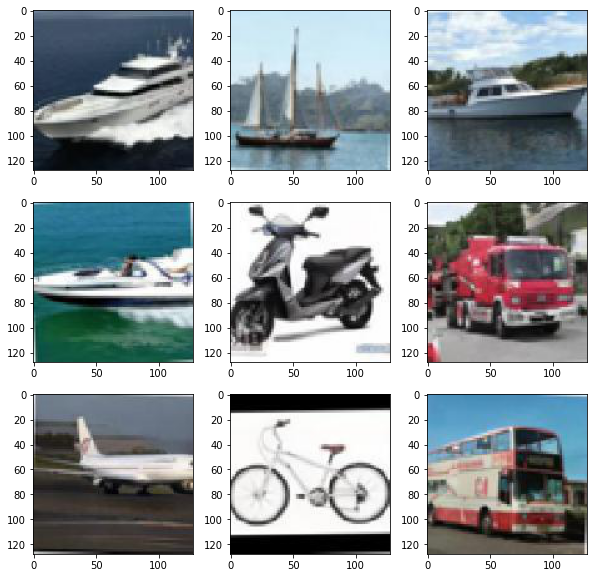

In [ ]:
x = captcha()
images,lab = x.captcha_creator()

In [ ]:
x.number

4

In [ ]:
x.check()

Enter number of  boat
4
Correct


In [ ]:
from typing_extensions import Counter
#Predicting by our model

test = normalize(images)
test_target = convert(lab)
y_pred_svm = model.predict(test)

out = []
for i in y_pred_svm:
  out.append(ls[i])

print("Print actual result is ",x.number,"Our model predicted is " ,out.count(out[0]))

Print actual result is  4 Our model predicted is  4


## Part B: Ensemble Models

You started a Car Selling business and you are giving recommendations to people for buying cars.

We have provided a dataset to help you start your business.


Dataset: https://github.com/sarang-iitb/Car_Condition_evaluation_dataset


Now, your job is to train a robust model and we will test how good you are on the test set.

In [ ]:
# # get the dataset
# !wget 'paste_link_here'

### Data Preparation: Perform necessary transformations on the input dataset to prepare it for ML model training.

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
os.chdir('/content')

In [ ]:
# get the dataset
!git clone https://github.com/sarang-iitb/Car_Condition_evaluation_dataset

Cloning into 'Car_Condition_evaluation_dataset'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
os.chdir('Car_Condition_evaluation_dataset')

In [ ]:
df = pd.read_csv('training_data.csv')
df.tail()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
1549,high,vhigh,4,2,small,low,Bad_deal
1550,med,vhigh,4,more,med,high,Bad_deal
1551,vhigh,low,4,4,big,med,Bad_deal
1552,low,vhigh,3,more,small,high,Bad_deal
1553,low,med,3,4,big,high,Nice_deal


In [ ]:
df[['How_is_the_deal','Buying_Cost']].groupby('How_is_the_deal').count()

,Buying_Cost
How_is_the_deal,
Bad_deal,1434
Nice_deal,120


We can see that our data 1434 -ve examples and 120 +ve. So training on whole data will lead to dumb classifier which will give Bad_deal most of the time.

In [ ]:
df['How_deal']=np.where(df['How_is_the_deal']=="Bad_deal",0,1)
y_df = df['How_deal']
df = df.drop(['How_is_the_deal','How_deal'],axis = 1)

Converting the target column into 1 and 0 binary classification

In [ ]:
y_df.tail()

1549    0
1550    0
1551    0
1552    0
1553    1
Name: How_deal, dtype: int64

Dropping the column to predict

In [ ]:
df['Luggage_Space'].unique()

array(['small', 'med', 'big'], dtype=object)

We can see that data is categorical with most of data has 3-4 unique values. So we can use OneHotEncoding which will increase number of features but not much as less values are there

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df).toarray())
encoder_df.columns = encoder.get_feature_names_out()
#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buying_Cost               1554 non-null   object 
 1   Maintainance_Cost         1554 non-null   object 
 2   Number_of_doors           1554 non-null   object 
 3   Number_of_Passenger       1554 non-null   object 
 4   Luggage_Space             1554 non-null   object 
 5   Safety_Features           1554 non-null   object 
 6   Buying_Cost_high          1554 non-null   float64
 7   Buying_Cost_low           1554 non-null   float64
 8   Buying_Cost_med           1554 non-null   float64
 9   Buying_Cost_vhigh         1554 non-null   float64
 10  Maintainance_Cost_high    1554 non-null   float64
 11  Maintainance_Cost_low     1554 non-null   float64
 12  Maintainance_Cost_med     1554 non-null   float64
 13  Maintainance_Cost_vhigh   1554 non-null   float64
 14  Number_o

Dropping the original columns

In [ ]:
final_df = final_df.drop(['Buying_Cost'	,'Maintainance_Cost'	,'Number_of_doors'	,'Number_of_Passenger'	,'Luggage_Space'	,'Safety_Features'],axis =1)

In [ ]:
final_df['How_is_the_deal'] = y_df

Splitting data into +ve class and -ve class

In [ ]:
bad = final_df.where(final_df['How_is_the_deal'] == 0)
good = final_df.where(final_df['How_is_the_deal'] == 1)

In [ ]:
y_good = good["How_is_the_deal"]
y_bad = bad['How_is_the_deal']
good = good.drop(['How_is_the_deal'],axis = 1)
bad = bad.drop(['How_is_the_deal'],axis = 1)
final_df = final_df.drop(['How_is_the_deal'],axis = 1)

Creating multiple target columns

### Ensemble Model: Train any ensemble model of your choice combining your favorite models. In particular, we would like you to try both bagging and boosting.
* Bag of models of your choice
* Adaboost or XGBoost


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def cross(data,target,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(target[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(target[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test

Running on whole data set

In [ ]:
X = final_df
Y = y_df

base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 42)
for i in range(5):
  x_train,x_test,y_train,y_test = cross(X,Y,5,i)
  m  = model.fit(x_train,y_train)
  k = m.predict(x_test)
  print(accuracy_score(k,y_test))

0.9935483870967742
0.9903225806451613
1.0
0.9903225806451613
0.9904458598726115


Running on whole dataset leads to dumb classifier as entropy of data is very low since most of data is of bad_deal So  high accuracy is achieved

In [ ]:
X = final_df
Y = y_df

model = AdaBoostClassifier(n_estimators=100, random_state=42)
for i in range(5):
  x_train,x_test,y_train,y_test = cross(X,Y,5,i)
  m  = model.fit(x_train,y_train)
  k = m.predict(x_test)
  print(accuracy_score(k,y_test))

0.9967741935483871
1.0
1.0
0.9903225806451613
0.9936305732484076


Same case in boosting

It is like a dumb predictor as our dataset is mostly bad deal

We will run on equal number data from each class i.e 120

In [ ]:
import random

Creating a smaller set with almost equal number of Nice deal and bad deal

In [ ]:
# Choosing 120 -ve class data randomly
ind = random.sample(range(0, 1434),120)
X = pd.concat([good, bad.iloc[ind]],ignore_index=True)
Y = pd.concat([y_good, y_bad.iloc[ind]],ignore_index=True)
X = X.dropna()
Y = Y.dropna()
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 42)
for i in range(5):
  x_train,x_test,y_train,y_test = cross(X,Y,5,i)
  m  = model.fit(x_train,y_train)
  k = m.predict(x_test)
  print(accuracy_score(k,y_test))

1.0
1.0
1.0
0.9782608695652174
0.9166666666666666


In [ ]:
ind = random.sample(range(0, 1434),120)
X = pd.concat([good, bad.iloc[ind]],ignore_index=True)
Y = pd.concat([y_good, y_bad.iloc[ind]],ignore_index=True)
X = X.dropna()
Y = Y.dropna()

model = AdaBoostClassifier(n_estimators=100, random_state=42)
for i in range(5):
  x_train,x_test,y_train,y_test = cross(X,Y,5,i)
  m  = model.fit(x_train,y_train)
  k = m.predict(x_test)
  print(accuracy_score(k,y_test))

1.0
1.0
1.0
0.9782608695652174
0.96


Testing the smaller model on larger data

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ind = random.sample(range(0, 1434),120)
X = pd.concat([good, bad.iloc[ind]],ignore_index=True)
Y = pd.concat([y_good, y_bad.iloc[ind]],ignore_index=True)
X = X.dropna()
Y = Y.dropna()
X_test = final_df
Y_test = y_df
model = AdaBoostClassifier(n_estimators=100, random_state=42)
m  = model.fit(X,Y)
y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.9671814671814671

This model gives 96% accuracy but if we take more samples from -ve class data it becomes accurate but entropy of data reduces so it is not generalized

In [ ]:
ind = random.sample(range(0, 1434),500)
X = pd.concat([good, bad.iloc[ind]],ignore_index=True)
Y = pd.concat([y_good, y_bad.iloc[ind]],ignore_index=True)
X = X.dropna()
Y = Y.dropna()
X_test = final_df
Y_test = y_df
model = AdaBoostClassifier(n_estimators=100, random_state=42)
m  = model.fit(X,Y)
y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.9974259974259975

We increased -ve class data to 500 and accuracy shot up. We can say that entropy of data should be higher so that model is more generalized

In [ ]:
ind = random.sample(range(0, 1434),120)
X = pd.concat([good, bad.iloc[ind]],ignore_index=True)
Y = pd.concat([y_good, y_bad.iloc[ind]],ignore_index=True)
X = X.dropna()
Y = Y.dropna()
X_test = final_df
Y_test = y_df
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 42)
m  = model.fit(X,Y)
y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.9761904761904762

This model gives 97% accuracy but it's not a dumb classifier as training data has more entropy

Importing test data

In [ ]:
test = pd.read_csv('testing_data.csv')
deal_num = test['Deal_num']
test = test.drop('Deal_num',axis =1)
test.head()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,low,low,5more,more,big,high
1,low,low,2,2,small,high
2,low,med,5more,4,med,low
3,low,low,4,2,big,low
4,low,low,4,2,med,high


Performing OneHotEncoding on data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(test).toarray())
encoder_df.columns = encoder.get_feature_names_out()
#merge one-hot encoded columns back with original DataFrame
test_df = test.join(encoder_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buying_Cost               174 non-null    object 
 1   Maintainance_Cost         174 non-null    object 
 2   Number_of_doors           174 non-null    object 
 3   Number_of_Passenger       174 non-null    object 
 4   Luggage_Space             174 non-null    object 
 5   Safety_Features           174 non-null    object 
 6   Buying_Cost_low           174 non-null    float64
 7   Maintainance_Cost_high    174 non-null    float64
 8   Maintainance_Cost_low     174 non-null    float64
 9   Maintainance_Cost_med     174 non-null    float64
 10  Number_of_doors_2         174 non-null    float64
 11  Number_of_doors_3         174 non-null    float64
 12  Number_of_doors_4         174 non-null    float64
 13  Number_of_doors_5more     174 non-null    float64
 14  Number_of_

Making test data same dimension as train data

In [ ]:
for i in good.columns:
  if i not in test_df.columns:
    test_df[i] = 0

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buying_Cost               174 non-null    object 
 1   Maintainance_Cost         174 non-null    object 
 2   Number_of_doors           174 non-null    object 
 3   Number_of_Passenger       174 non-null    object 
 4   Luggage_Space             174 non-null    object 
 5   Safety_Features           174 non-null    object 
 6   Buying_Cost_low           174 non-null    float64
 7   Maintainance_Cost_high    174 non-null    float64
 8   Maintainance_Cost_low     174 non-null    float64
 9   Maintainance_Cost_med     174 non-null    float64
 10  Number_of_doors_2         174 non-null    float64
 11  Number_of_doors_3         174 non-null    float64
 12  Number_of_doors_4         174 non-null    float64
 13  Number_of_doors_5more     174 non-null    float64
 14  Number_of_

In [ ]:
test_df = test_df.loc[:,good.columns]

In [ ]:
y_pred = model.predict(test_df)
y_pred

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0.])

In [ ]:
data = {'Deal_num' : deal_num, 'How_deal':y_pred}
out = pd.DataFrame(data)
out['How_is_the_deal'] = out['How_deal'].map({0:'Bad_deal',1:'Nice_deal'})
out = out.drop('How_deal',axis=1)
out.head(10)

,Deal_num,How_is_the_deal
0,0,Nice_deal
1,1,Bad_deal
2,2,Bad_deal
3,3,Bad_deal
4,4,Bad_deal
5,5,Bad_deal
6,6,Nice_deal
7,7,Nice_deal
8,8,Bad_deal
9,9,Bad_deal


In [ ]:
#Result for bonus marks
#In folder /Car_Condition_evaluation_dataset
out.to_csv('submission.csv')